## Online Shopping Analysis

#### Arhum Zafar 

With [recent surveys](https://www.wsj.com/articles/ten-global-consumer-trends-for-2021-11610976600) indicating that the total amount of direct sales to online consumers will surpass over $5 trillion dollars in 2021, I’ve become intrigued as to how important it has become to understand factors that influence consumers’ intentions to buy rather than just browse. 

In [2]:
# Import necessities

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
# read the dataset
data = pd.read_csv('online_shoppers_intention.csv')

##### Check the data

In [5]:
# What are we missing?

data.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [10]:
# Let's take care of those missing entries.

data.fillna(0, inplace = True)

In [12]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

By looking above, there are columns named *BounceRates* and *ExitRates*. This could possibly tell us more about customers that leave a website without purchasing an item.

The **bounce rate** is defined as the percentage of people who leave your website after visiting only a single page.

Let's look into this.

In [18]:
bounce = data.iloc[:, [5,6]].values
bounce.shape

(12330, 2)

### Clustering

To continue, let's use KMeans to determine the correct # of clustering groups. Specifically, we'll use the [elbow method](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html).

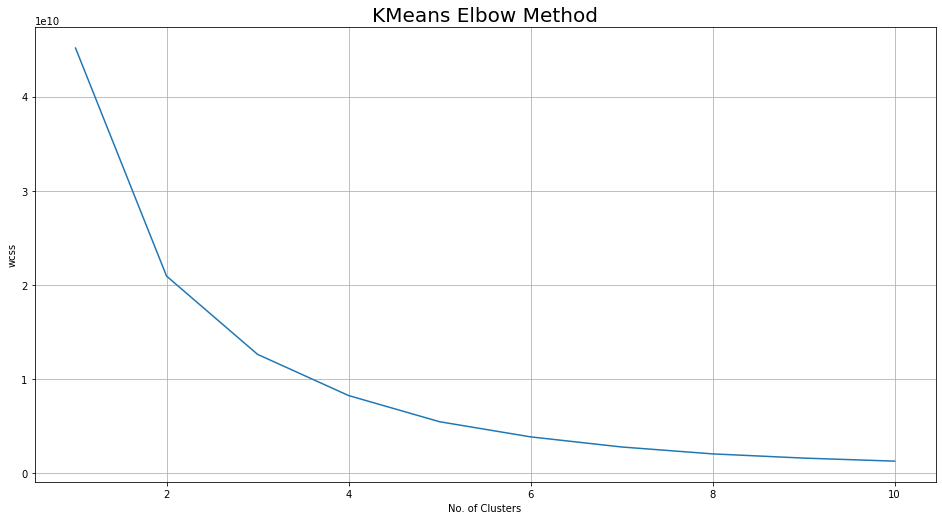

In [26]:
from sklearn.cluster import KMeans

cluster_scores = []

for i in range(1,11): # I counted 15 different features.
    
    km = KMeans(n_clusters = i, 
               init = 'k-means++',
               max_iter = 300,
               n_init = 10,
               random_state =  23,
               algorithm = 'full',
               tol = 0.001)
    
    km.fit(bounce)
    labels = km.labels_
    cluster_scores.append(km.inertia_)
    

plt.figure()
plt.rcParams['figure.figsize'] = (13, 7)
plt.plot(range(1, 11), cluster_scores)
plt.grid()
plt.tight_layout()
plt.title('KMeans Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()
    

When observing the graph above, it seems like the optimal amount of clusters in 2. Let's use KMeans with 2 clusters to see the relationship between the duration of the product and the bounce rate. 

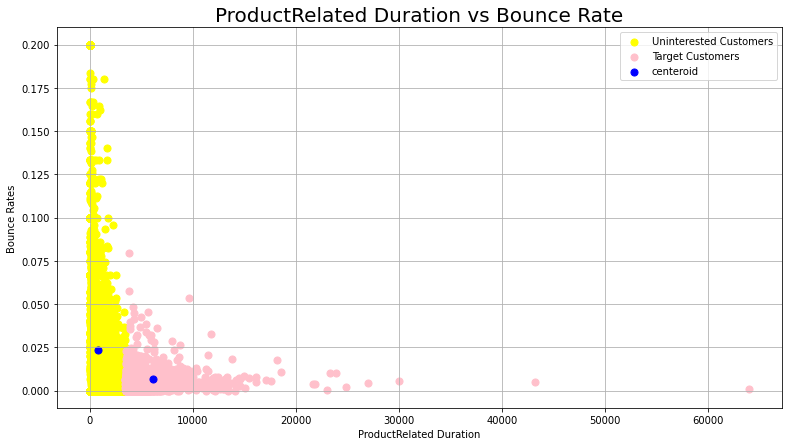

In [31]:
km = KMeans(n_clusters=2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 23)

pred_means = km.fit_predict(bounce)

plt.scatter(bounce[pred_means == 0, 0], bounce[pred_means == 0, 1], s = 50, c = 'yellow', label = 'Uninterested Customers')
plt.scatter(bounce[pred_means == 1, 0], bounce[pred_means == 1, 1], s = 50, c = 'pink', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('ProductRelated Duration vs Bounce Rate', fontsize = 20)
plt.grid()
plt.xlabel('ProductRelated Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

The resulting figure confidently tells us that that customers who spent more time on a product-related website are very less likely to leave the website after viewing a single page.


It’s important to note that KMeans is not a supervised learning method, thus, we can use other ways of evaluating its clustering result.

The leftmost column of the confusion matrix represents the actual label (True or False revenue), and the top row represents the expected clustering groups (uninterested customers or target customers):

Adjusted rand index: 
0.08359442469281109


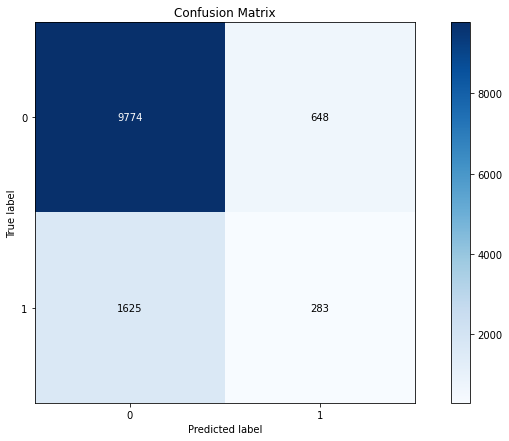

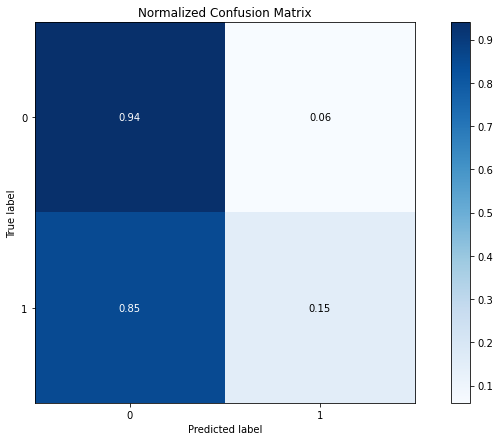

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels_true = le.fit_transform(data['Revenue'])

# get predicted clustering result label
labels_pred = pred_means

# print adjusted rand index, which measures the similarity of the two assignments
from sklearn import metrics
score = metrics.adjusted_rand_score(labels_true, labels_pred)
print("Adjusted rand index: ")
print(score)

# print confusion matrix
#cm = metrics.plot_confusion_matrix(None, labels_true, labels_pred)
#print(cm)

import scikitplot as skplt
plt_1 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=False)
plt_2 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=True)

From the above confusion matrix, we see that 10,422 failed incomes, 9,769 are grouped into uninterested customers or 94%. However, out of 937 successful incomes, only 284 are grouped as target customers or 15%. Also, the adjusted index score is not very high.